### K-mean Clustering (Unsupervised Learning)

1. Prepare Data
2. decide how many clusters you need.(평준화)
3. choose initial center of cluster.(centroid) 중심
    @ randomly select centroid
    @ manually assign centroid
    @ kmean++
4. assign data point to nearest cluster.
5. move centroid to the center of its cluster.
6. repeat step 4 and step 5

**Until there is no assigned cluster change Clustering**

** 모든 행위가 끝나는 시점 **
1. centroid가 변화가 없을때
2. Maxium Clustering assignment 횟수를 지나쳤을때


### 1. Prepare data


<img src="./image/k-mean01.png" height="300" width="600">

### We want three clusters (k=3)

<img src="./image/k-mean02.png" height="300" width="600">

** 1 -> 7 다 돌아서 가장 가까운것에 같은 색을 칠한다. **

### First assignment is done!

<img src="./image/k-mean03.png" height="300" width="600">

### Move Centroid to the Center of Cluster

<img src="./image/k-mean04.png" height="300" width="600">

### From each data point, assign cluster again using distance
** 1 -> 7 다 돌아서 가장 가까운것에 같은 색을 칠한다. **

<img src="./image/k-mean05.png" height="300" width="600">

### assign cluster again until there is no cluster assignment change or hit the maximum iteration count

Centroid의 움직이 없거나 반복 카운트가 끝났다면 1->7번 까지 Euclidean distance 거리 측정을 하지 않는다.

### no cluster change, so k-mean clustering is done!
<img src="./image/k-mean06.png" height="300" width="600">

### How to init centroid ?

1. randomly choose (마음가는 대로)
2. manually assign init centroid (Inital Point 지정)

<img src="./image/k-mean07.png" height="300" width="600">

3. k-mean++ init centroid

select first data point as first centroid

3-1. 가장 가까운 첫번째 값을 만났을때 첫번째 Centroid 지정
3-2. 첫번째 Centroid에서 가장 멀리 있는 값에 두번째 Centroid 지정
3-3. 첫번째 Centroid 와 두번째 Centroid 공통적으로 가장 먼곳에 세번째
     Centroid 지정
     
     sklearn 에서 아무런 값도 지정 하지 않는다면 k-mean++  centroid 동작

<img src="./image/k-mean08.png" height="300" width="600">

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Create data points 

In [3]:
df = pd.DataFrame(columns=['x','y'])

In [4]:
df.loc[0] = [3,1]
df.loc[1] = [4,1]
df.loc[2] = [3,2]
df.loc[3] = [4,2]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,1]
df.loc[9] = [15,2]
df.loc[10] = [16,1]
df.loc[11] = [16,2]

In [6]:
df.head(20)

,x,y
0,3,1
1,4,1
2,3,2
3,4,2
4,10,5
5,10,6
6,11,5
7,11,6
8,15,1
9,15,2


### Visualize data points on 2D plot

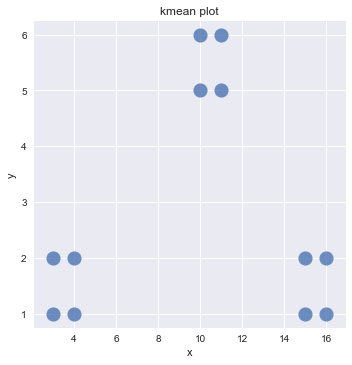

In [7]:
# visualize data point
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s":200}) 
# x-axis, y-axis, data, no line, marker size

# title
plt.title('kmean plot')

# x-axis label
plt.xlabel('x')

# y-axis label
plt.ylabel('y')

### k-mean clustering

In [8]:
# convert dataframe to numpy array
data_points = df.values

In [9]:
kmeans = KMeans(n_clusters=3).fit(data_points)

In [10]:
# cluster id for each data point
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2], dtype=int32)

In [11]:
# this is final centroids position
kmeans.cluster_centers_

array([[ 10.5,   5.5],
       [  3.5,   1.5],
       [ 15.5,   1.5]])

In [12]:
df['cluster_id'] = kmeans.labels_

In [13]:
df.head(12)

,x,y,cluster_id
0,3,1,1
1,4,1,1
2,3,2,1
3,4,2,1
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,1,2
9,15,2,2


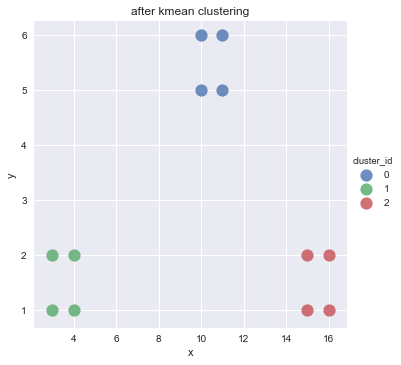

In [14]:
sns.lmplot('x', 'y', data=df, fit_reg=False, # x-axis, y-axis, data, no line 
          scatter_kws={"s":150}, # marker size
          hue="cluster_id") #color

# title
plt.title('after kmean clustering')